In [1]:
import numpy as np
import pandas as pd
import xarray as xr
%matplotlib inline

In [41]:
bounds = dict(y=slice(None, 1400), x=slice(1100, None))
ds16 = xr.open_dataset('LVMC_2016_h27v12.nc').isel(**bounds)
ds17 = xr.open_dataset('LVMC_2017_h27v12.nc').isel(**bounds)
ds = xr.concat([ds16, ds17], dim='time')
ds

<xarray.Dataset>
Dimensions:     (time: 154, x: 1300, y: 1400)
Coordinates:
  * y           (y) float64 -3.336e+06 -3.336e+06 -3.337e+06 -3.337e+06 ...
  * x           (x) float64 1.052e+07 1.052e+07 1.052e+07 1.052e+07 ...
  * time        (time) datetime64[ns] 2016-01-01 2016-01-05 2016-01-09 ...
Data variables:
    lvmc_mean   (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
    lvmc_stdv   (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
    sinusoidal  (time) |S1 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' ...
Attributes:
    _NCProperties:             version=1|netcdflibversion=4.4.1|hdf5libversio...
    publisher_email:           marta.yebra@anu.edu.au
    creator_name:              Zac Hatfield-Dodds
    license:                   Creative Commons with Attribution (https://cre...
    title:                     Live Vegetation Moisture Content (LVMC), Austr...
    keywords_vocabulary:       GCMD Science Keywords, Version 8.0.0.0.0
    standard_

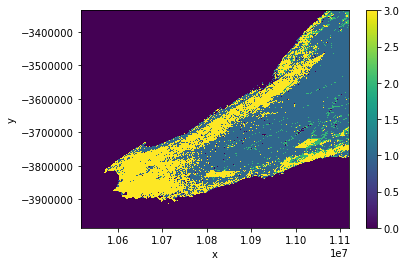

In [39]:
cover = xr.open_dataset('landcover.2013.h27v12.nc').isel(**bounds)
cover['y'] = ds.y
cover['x'] = ds.x
cover['grass'] = sum((cover.Land_Cover_Type_1 == i) for i in (10, 12)).astype(bool)
cover['shrub'] = sum((cover.Land_Cover_Type_1 == i) for i in (6, 7)).astype(bool)
cover['forest'] = sum((cover.Land_Cover_Type_1 == i) for i in (1, 2, 3, 4, 5, 8, 9)).astype(bool)
del cover['Land_Cover_Type_1']
(cover.grass + 2 * cover.shrub + 3 * cover.forest).plot.imshow()

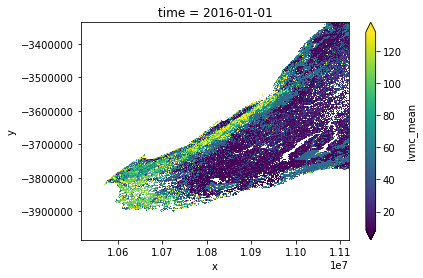

In [40]:
ds.lvmc_mean.isel(time=0).plot.imshow(robust=True)

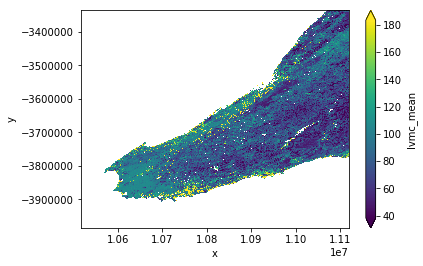

In [43]:
lvmc = ds.lvmc_mean
base = lvmc.mean(dim='time')
base.plot.imshow(robust=True)

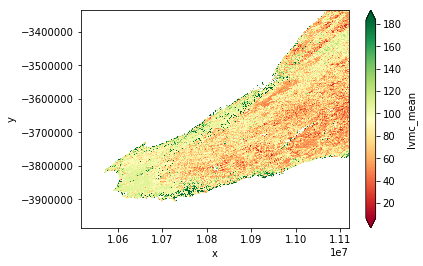

In [51]:
base.plot.imshow(cmap='RdYlGn', center=95, robust=True)